# Breast Cancer Classification - Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.insert(0, os.path.abspath('../data'))

In [3]:
df = pd.read_csv('../data/raw_data.csv')

## Initial data overview

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<b><i></b>/<i>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<b><i>The dataset contains 569 observations and 32 columns in total.  
The target variable is **`diagnosis`**, indicating whether a tumor is malignant (`M`) or benign (`B`).  
The remaining **30 features** are continuous, numeric variables describing various properties of cell nuclei extracted from digitized images of breast masses.<br>
The dataset is **complete**, with no missing values present.  
Additionally, all explanatory variables are of the correct data type — specifically, **floating-point (`float`)**, which is appropriate for statistical analysis and model training.
</b></i>

## Target exploration

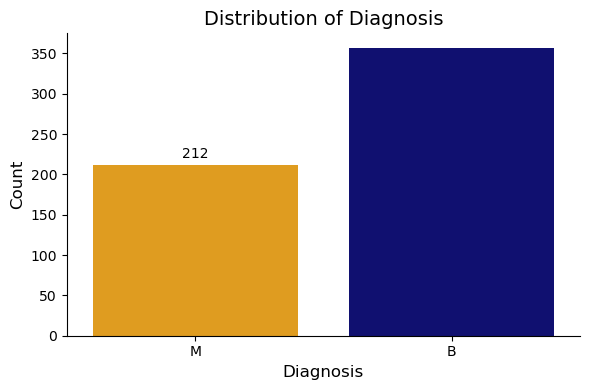

In [10]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(
    data=df,
    x="diagnosis",
    hue="diagnosis",
    palette={"M": "orange", "B": "navy"}, 
    legend=False
)

ax.set_title("Distribution of Diagnosis", fontsize=14)
ax.set_xlabel("Diagnosis", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)

sns.despine()  
ax.grid(False)

plt.tight_layout()
plt.show()

<b><i>The target variable 'diagnosis' is imbalanced, with benign cases ('B') being more frequent than malignant ones ('M').
However, the imbalance is moderate (approximately 63% benign vs. 37% malignant) and does not necessarily require the application of resampling techniques such as oversampling or undersampling at this stage.
Instead, model performance can initially be addressed using appropriate evaluation metrics and class weighting.
</b></i>

## Features exploration

In [14]:
df_corr = df.copy()
df_corr["diagnosis"] = df_corr["diagnosis"].map({"B": 0, "M": 1})

df_corr = df_corr.drop(columns="id")

corr_matrix = df_corr.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


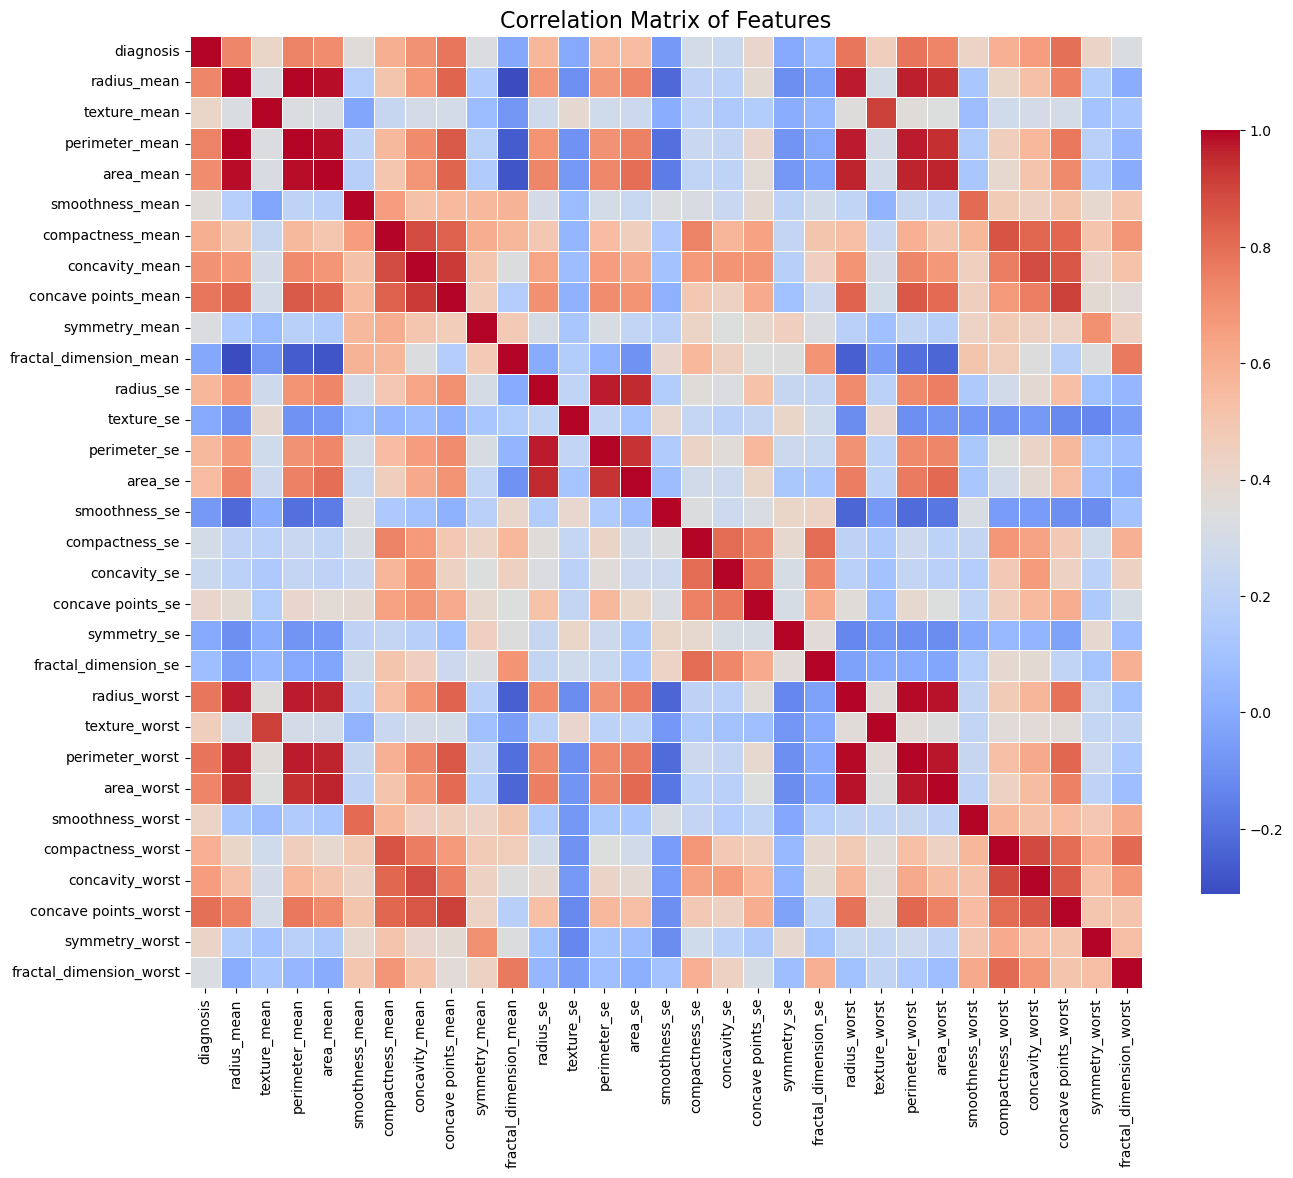

In [15]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
diagnosis_corr = corr_matrix["diagnosis"].drop("diagnosis").abs()
high_corr_features = diagnosis_corr[diagnosis_corr > 0.7].sort_values(ascending=False)

print('Highly correlated features:')
print(high_corr_features)

Highly correlated features:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
Name: diagnosis, dtype: float64


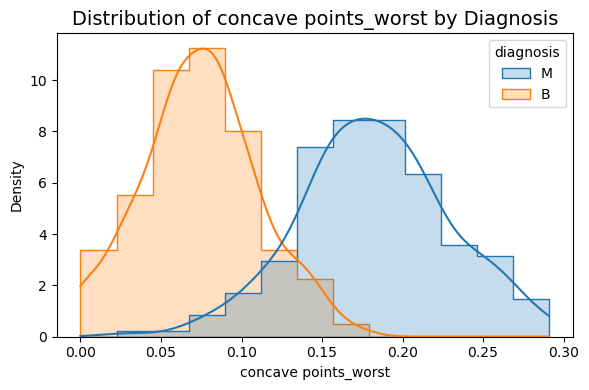

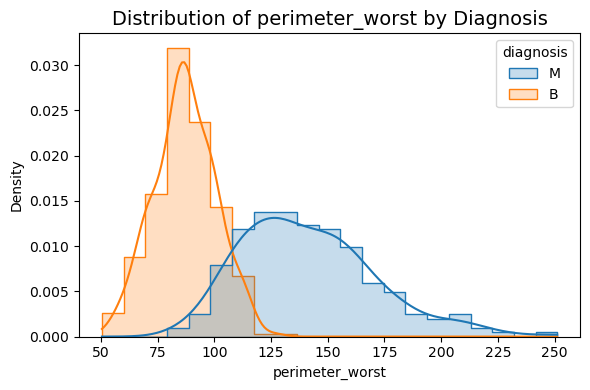

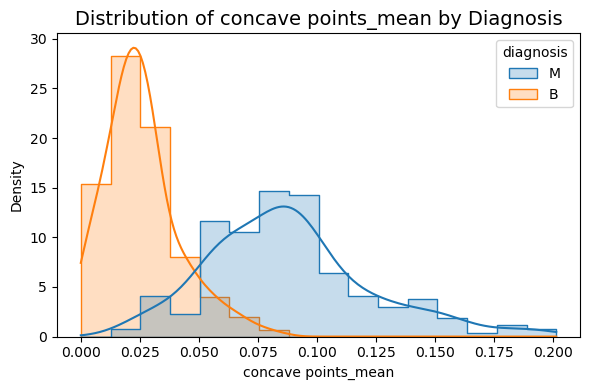

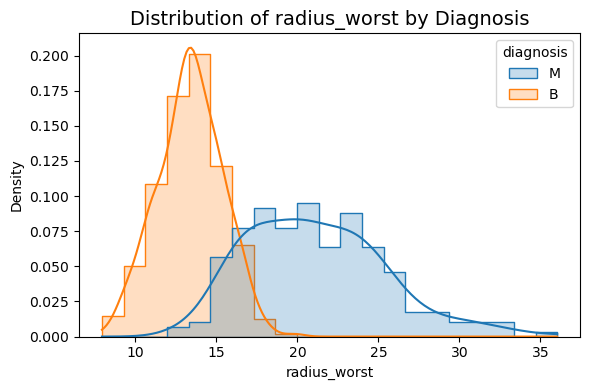

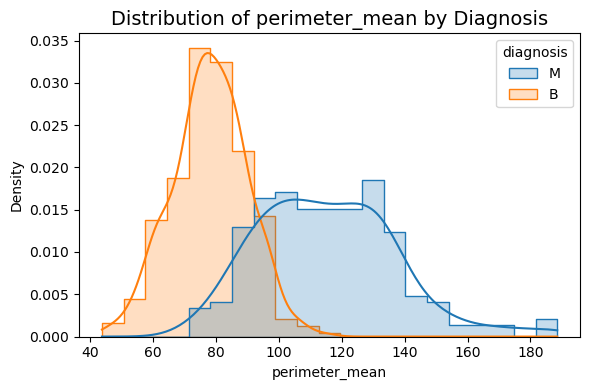

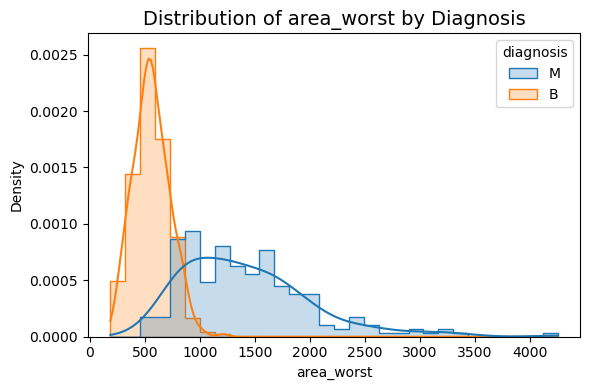

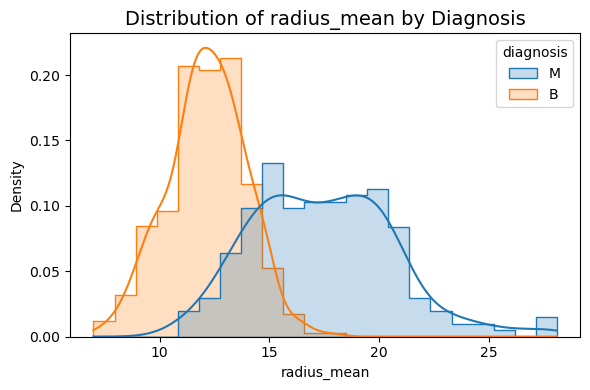

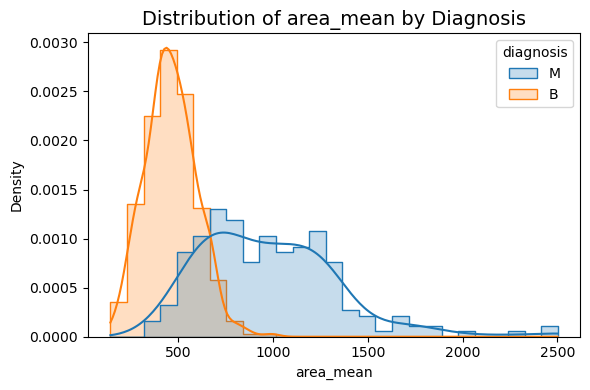

In [41]:
for feature in high_corr_features.index:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue="diagnosis", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {feature} by Diagnosis", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

<b><i>Out of the 30 features analyzed, 8 show a strong correlation (|r| > 0.7) with the target variable 'diagnosis'.
These include variables such as 'concave points_mean', 'radius_worst', and 'area_worst', among others.
Such a high level of correlation suggests that these features are particularly informative in distinguishing between malignant and benign tumors.
<bRHistogram analysis indicates that, in all of these highly correlated cases, higher feature values are consistently associated with malignant tumors (M), reinforcing the idea that larger and more irregular nuclei are characteristic of cancerous growths.
These observations highlight a set of strong predictive features for model training, although multicollinearity between them may need to be addressed.
</b></i>


## Section summary

This first phase provided a strong foundation for further modeling by identifying key features with high predictive potential.  
The dataset is clean and well-structured, and several variables show strong, positive correlation with malignancy, making them valuable for classification tasks.

